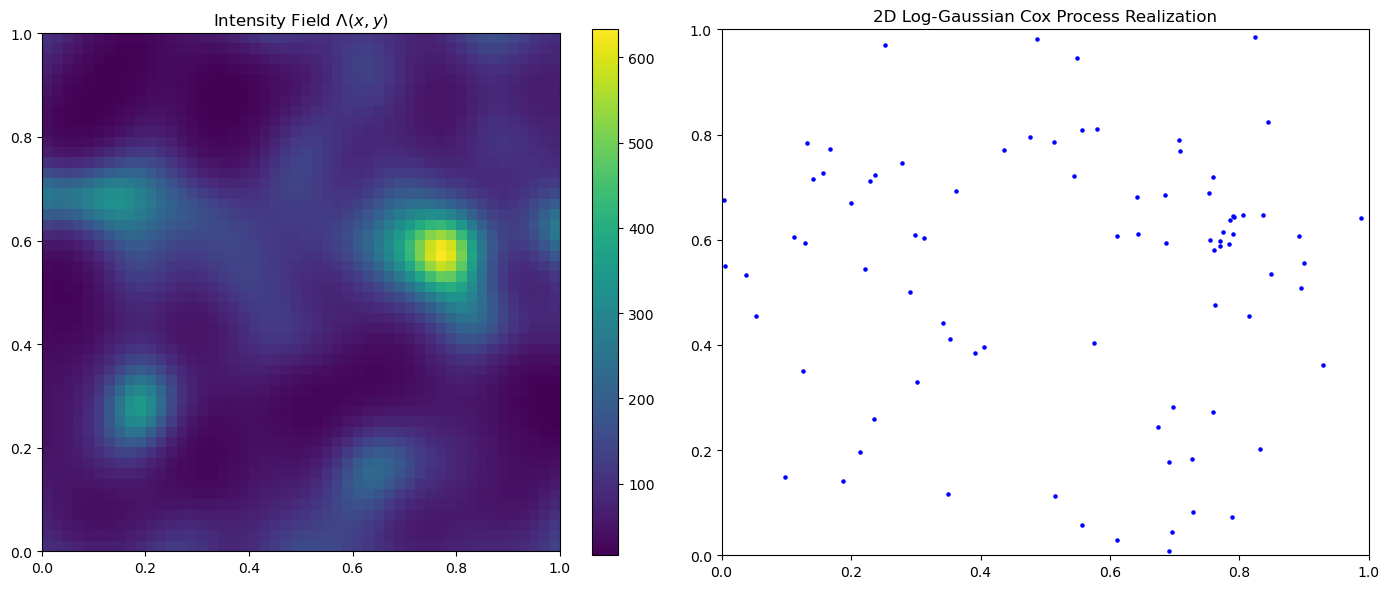

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
def simulate_2d_lgcp(domain_size, grid_size, mean_log_intensity, variance, length_scale):
    # Create grid
    x = np.linspace(0, domain_size, grid_size)
    y = np.linspace(0, domain_size, grid_size)
    xx, yy = np.meshgrid(x, y)
    coords = np.column_stack([xx.ravel(), yy.ravel()])
    
    # Compute covariance matrix (Squared Exponential Kernel)
    dists = cdist(coords, coords, metric='euclidean')
    K = variance * np.exp(-0.5 * (dists / length_scale)**2)
    
    # Sample from multivariate normal (Gaussian process)
    mean_vector = mean_log_intensity * np.ones(len(coords))
    G = np.random.multivariate_normal(mean_vector, K)
    
    # Exponentiate to get intensity
    Lambda = np.exp(G).reshape(grid_size, grid_size)
    
    # Simulate points
    dx = domain_size / grid_size
    points = []
    for i in range(grid_size):
        for j in range(grid_size):
            lam = Lambda[i, j]
            expected_points = lam * dx * dx
            num_points = np.random.poisson(expected_points)
            # Uniformly distribute points within the cell
            for _ in range(num_points):
                px = x[j] + dx * np.random.rand()
                py = y[i] + dx * np.random.rand()
                points.append((px, py))
    
    return np.array(points), x, y, Lambda

# Parameters
domain_size = 1          # Size of square domain
grid_size = 50            # Discretization resolution
mean_log_intensity = np.log(100)  # Mean of log-intensity field
variance = 0.5            # Variance of Gaussian field
length_scale = 0.1        # Correlation length scale

# Simulate 2D LGCP
points, x, y, Lambda = simulate_2d_lgcp(domain_size, grid_size, mean_log_intensity, variance, length_scale)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the intensity field
im = ax[0].imshow(Lambda, extent=(0, domain_size, 0, domain_size), origin='lower', cmap='viridis')
ax[0].set_title(r"Intensity Field $\Lambda(x,y)$")
fig.colorbar(im, ax=ax[0])

# Plot the point realization
ax[1].scatter(points[:, 0], points[:, 1], s=5, color='blue')
ax[1].set_xlim(0, domain_size)
ax[1].set_ylim(0, domain_size)
ax[1].set_title(r"2D Log-Gaussian Cox Process Realization")

plt.tight_layout()
plt.show()